In [17]:
print(__doc__)

# Code source adapted from: Jaques Grobler
# License: BSD 3 clause

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import os
import csv
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Automatically created module for IPython interactive environment


In [18]:
# Read and treat training dataset
dataset = pandas.read_csv('health-dataset/bags.csv').values
dataset = (dataset-dataset.max()/2) / dataset.max()

In [ ]:
kmeans_costs = []
kmeans_clusters = []
for n in range(2,51):
    print("Training KMeans for " + str(n) + " clusters")
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(dataset)
    
    labels = kmeans.predict(dataset)
    print("Silhouette Score: " + str(silhouette_score(dataset,labels)))
    
    kmeans_costs.append(kmeans.inertia_)
    kmeans_clusters.append(n)

Training KMeans for 2 clusters
Silhouette Score: 0.008992167497813144
Training KMeans for 3 clusters
Silhouette Score: 0.010562025094871749
Training KMeans for 4 clusters
Silhouette Score: 0.012611770227371939
Training KMeans for 5 clusters
Silhouette Score: 0.01489403708543666
Training KMeans for 6 clusters
Silhouette Score: 0.01487583514869673
Training KMeans for 7 clusters
Silhouette Score: 0.015418934225594495
Training KMeans for 8 clusters
Silhouette Score: 0.018791898685653344
Training KMeans for 9 clusters
Silhouette Score: 0.018511702077966898
Training KMeans for 10 clusters
Silhouette Score: 0.022736644590489914
Training KMeans for 11 clusters
Silhouette Score: 0.024524935931031673
Training KMeans for 12 clusters
Silhouette Score: 0.024896392974768113
Training KMeans for 13 clusters
Silhouette Score: 0.02418886956118355
Training KMeans for 14 clusters
Silhouette Score: 0.027321084370477533
Training KMeans for 15 clusters
Silhouette Score: 0.026407542525398203
Training KMeans f

-0.01245684157126199


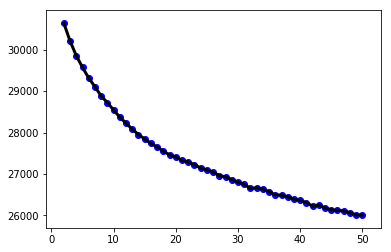

In [15]:
def graph_add_scatter(x, y, c='black'):
    plt.scatter(x, y, color= c)

def graph_add_line(x, y, c='black'):
    plt.plot(x, y, color=c, linewidth=3)

def plot(name=""):
    plt.xticks()
    plt.yticks()
    
    if name!="":
        plt.savefig(name)
    plt.show()
    plt.close()

labels = kmeans.predict(dataset)
print(silhouette_score(dataset,labels))
graph_add_line(kmeans_clusters, kmeans_costs)
graph_add_scatter(kmeans_clusters, kmeans_costs,c='blue')
plot()